<a href="https://colab.research.google.com/github/Nyamu007/GIS-/blob/main/05_beautiful_maps_with_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Beautiful map using GeoPandas

## Imports and dataset

In [1]:
!pip install geopandas

In [4]:
gpd.__version__

'0.14.4'

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = gpd.read_file('/content/sample_data/district.shp')
df.head()

,OBJECTID,DISTRICT,Province,SCode,DCode,SDD,SUM_length,SUM_area,Shape_Leng,Shape_Area,DistLabel,Name_Nep,geometry
0,1,ACHHAM,Sudur Pashchim,7,69,769,1702.678726,1702.678726,2.669525,0.157592,Achham,à¤ à¤à¤¾à¤®,"POLYGON ((81.46795 29.27188, 81.46795 29.27188..."
1,2,ARGHAKHANCHI,5,5,51,551,1239.074609,1239.074609,2.379111,0.113578,Arghakhanchi,à¤ à¤°à¥à¤à¤¾à¤à¤¾à¤à¤à¥,"POLYGON ((83.05092 28.11160, 83.05104 28.11159..."
2,3,BAGLUNG,Gandaki,4,45,445,1835.741748,1835.741748,2.885574,0.168958,Baglung,à¤¬à¤¾à¤à¤²à¥à¤,"POLYGON ((83.10729 28.63221, 83.10708 28.63187..."
3,4,BAITADI,Sudur Pashchim,7,74,774,1496.314027,1496.314027,2.499107,0.138875,Baitadi,à¤¬à¥à¤¤à¤¡à¥,"POLYGON ((80.79590 29.68829, 80.79590 29.68829..."
4,5,BAJHANG,Sudur Pashchim,7,68,768,3464.299347,3464.299347,3.156896,0.322441,Bajhang,à¤¬à¤à¤¾à¤,"POLYGON ((81.09080 30.05419, 81.09085 30.05420..."


## Basic map with `df.plot()`

<Axes: >

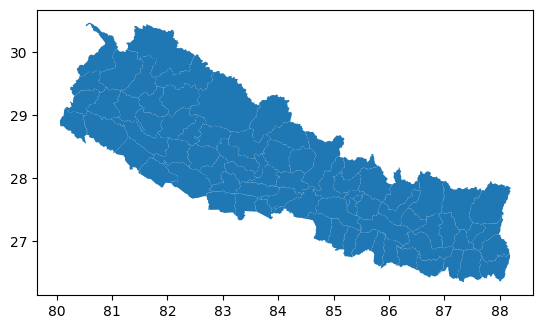

In [7]:
df.plot()

<Axes: >

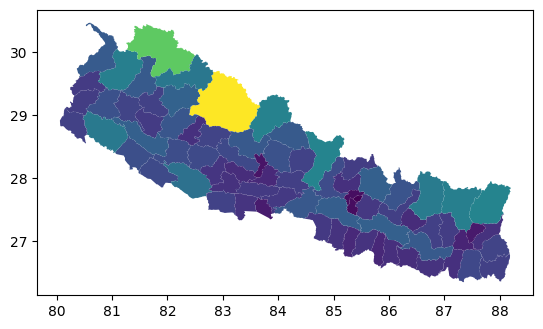

In [8]:
df.plot(column="SUM_area")

<Axes: >

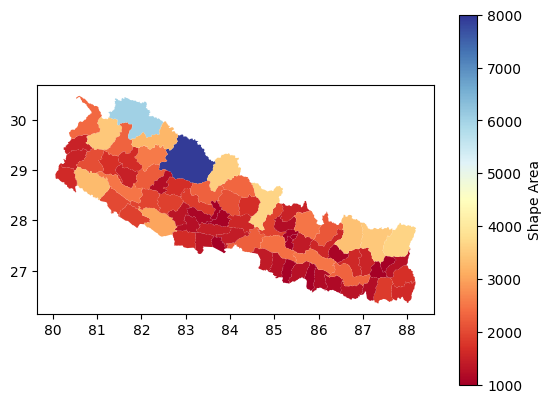

In [9]:
df.plot(column="SUM_area", cmap='RdYlBu', legend=True, vmin=1000, vmax=8000,
        legend_kwds={"label": "Shape Area"})

## Interacting with axis and label

Text(92.09722222222221, 0.5, 'Latitude')

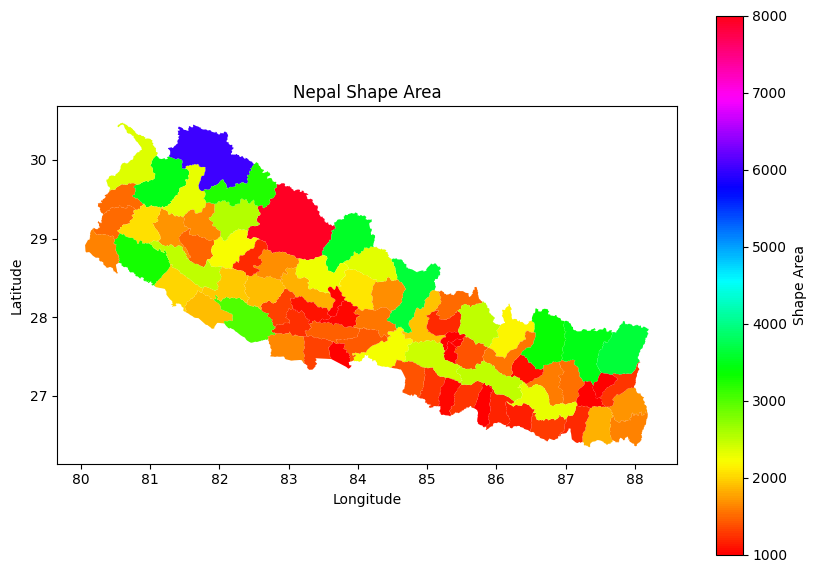

In [11]:
fig, ax1 = plt.subplots(1,1,figsize=(10,7))
ax1.set_title("Nepal Shape Area")
plot = df.plot(column="SUM_area", ax=ax1, cmap='hsv', legend=True, vmin=1000, vmax=8000,
        legend_kwds={"label": "Shape Area"})
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")

# ax1.set_xticks([])
# ax1.set_yticks([])

## Automation on maps

In [12]:
provinces = df['Province'].unique()
provinces

array(['Sudur Pashchim', '5', 'Gandaki', '2', 'Bagmati', '1', 'Karnali'],
      dtype=object)

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


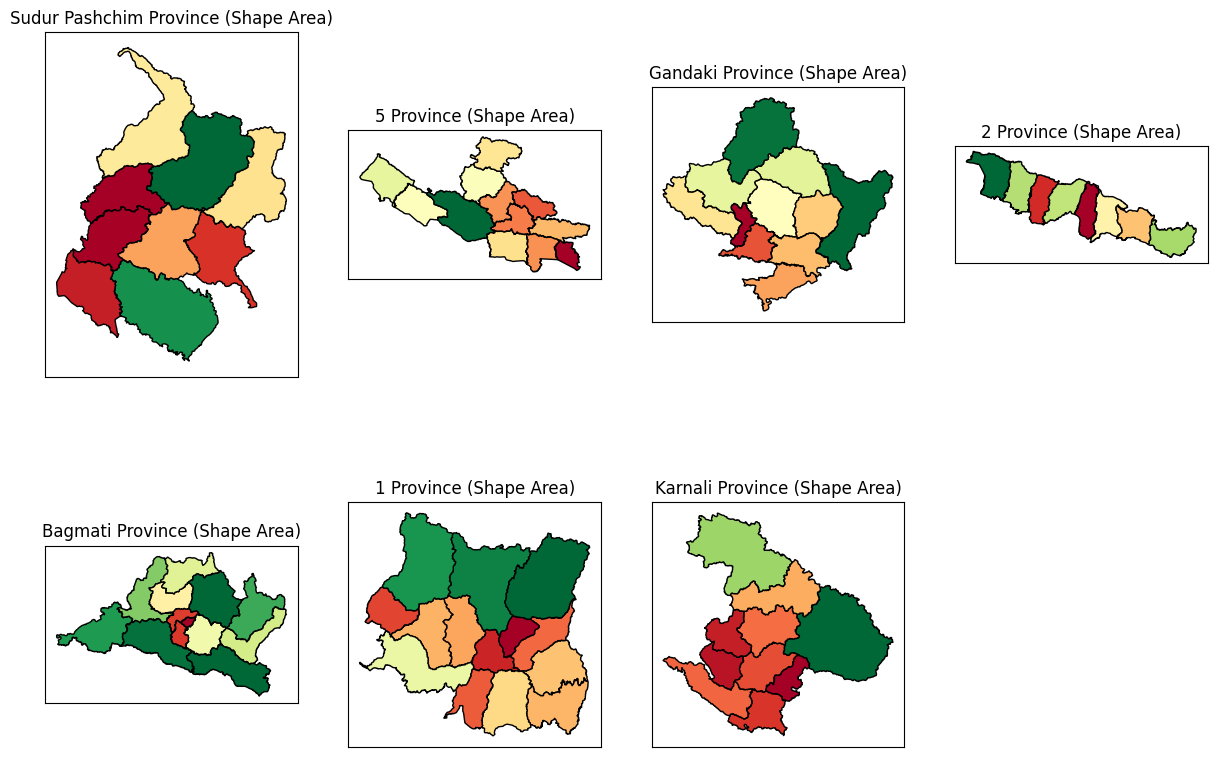

In [13]:
fig, ax = plt.subplots(2,4,figsize=(15,10))
axis = ax.flatten()

axis[7].remove()
print(axis)
for i, (ax, province) in enumerate(zip(axis,provinces)):

  df_province = df[df['Province']==province]

  ax.set_title(f"{province} Province (Shape Area)")
  plot = df_province.plot(column="SUM_area", ax=ax, cmap='RdYlGn', edgecolor='#000000')
  ax.set_xticks([])
  ax.set_yticks([])

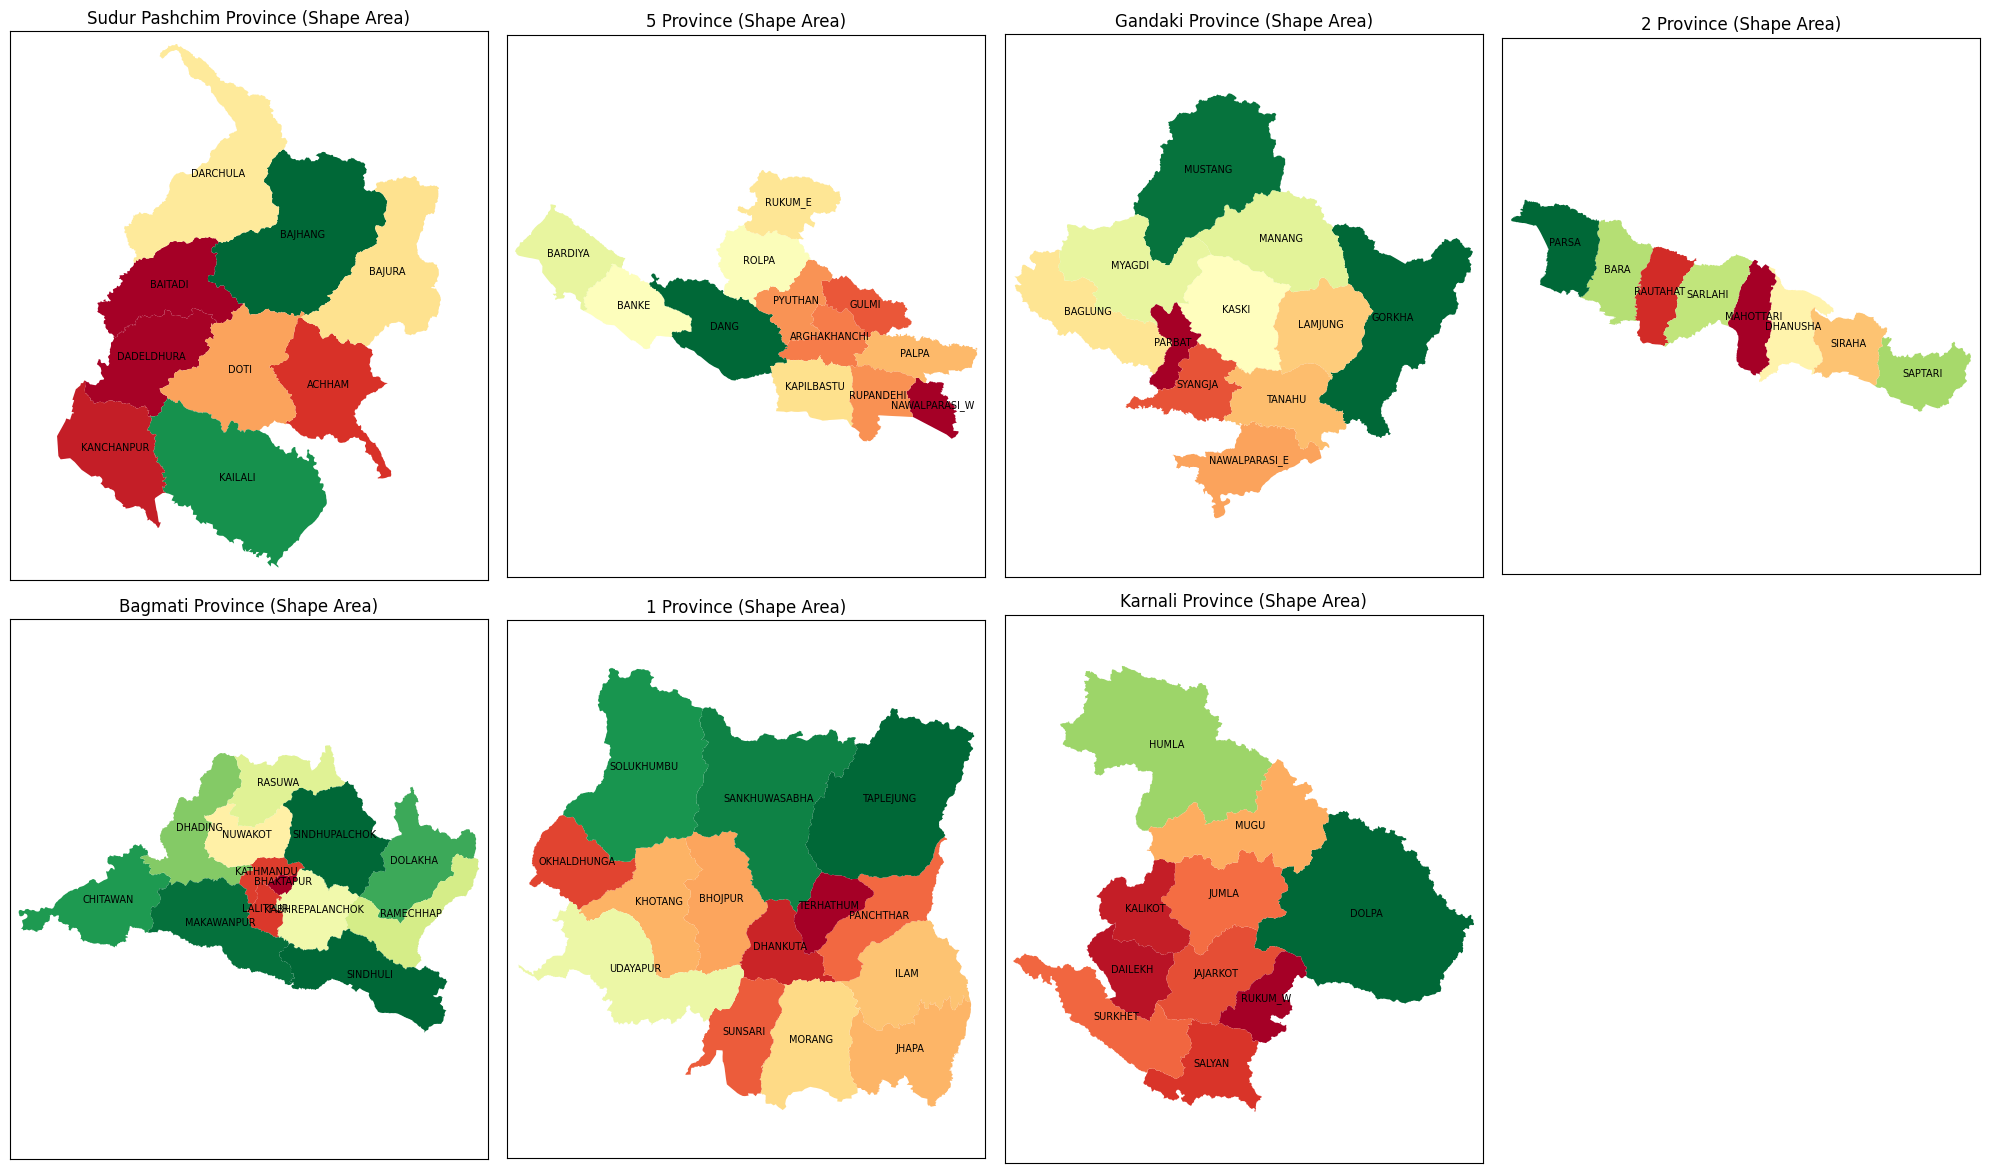

In [14]:
import numpy as np

# getting start with matplotlib suplots
fig, ax = plt.subplots(2,4,figsize=(20,12))
axis = ax.flatten()

# remove the last unncessary axis
axis[7].remove()

# for loop based on axis and province
for i, (ax, province) in enumerate(zip(axis,provinces)):

  # select the province
  df_province = df[df['Province']==province]

  # calculate geometry bounds
  x1, y1, x2, y2 = df_province.geometry.total_bounds

  # zoom to the selected feature
  max_range = np.array([x2-x1, y2-y1]).max()/2.0
  ax.set_xlim((x1+x2)*0.5-max_range-0.05, (x1+x2)*0.5+max_range+0.05)
  ax.set_ylim((y1+y2)*0.5-max_range-0.05, (y1+y2)*0.5+max_range+0.05)

  # label feature on map
  df_province.apply(lambda x: ax.annotate(text=x.DISTRICT, xy=x.geometry.centroid.coords[0], ha='center', size=7),axis=1)

  # plot province shape area
  ax.set_title(f"{province} Province (Shape Area)")
  plot = df_province.plot(column="SUM_area", ax=ax, cmap='RdYlGn')
  ax.set_xticks([])
  ax.set_yticks([])

# Remove unncessary white spaces
fig.tight_layout()
fig.savefig('/content/final_map.jpg', dpi=500, bbox_inches='tight')

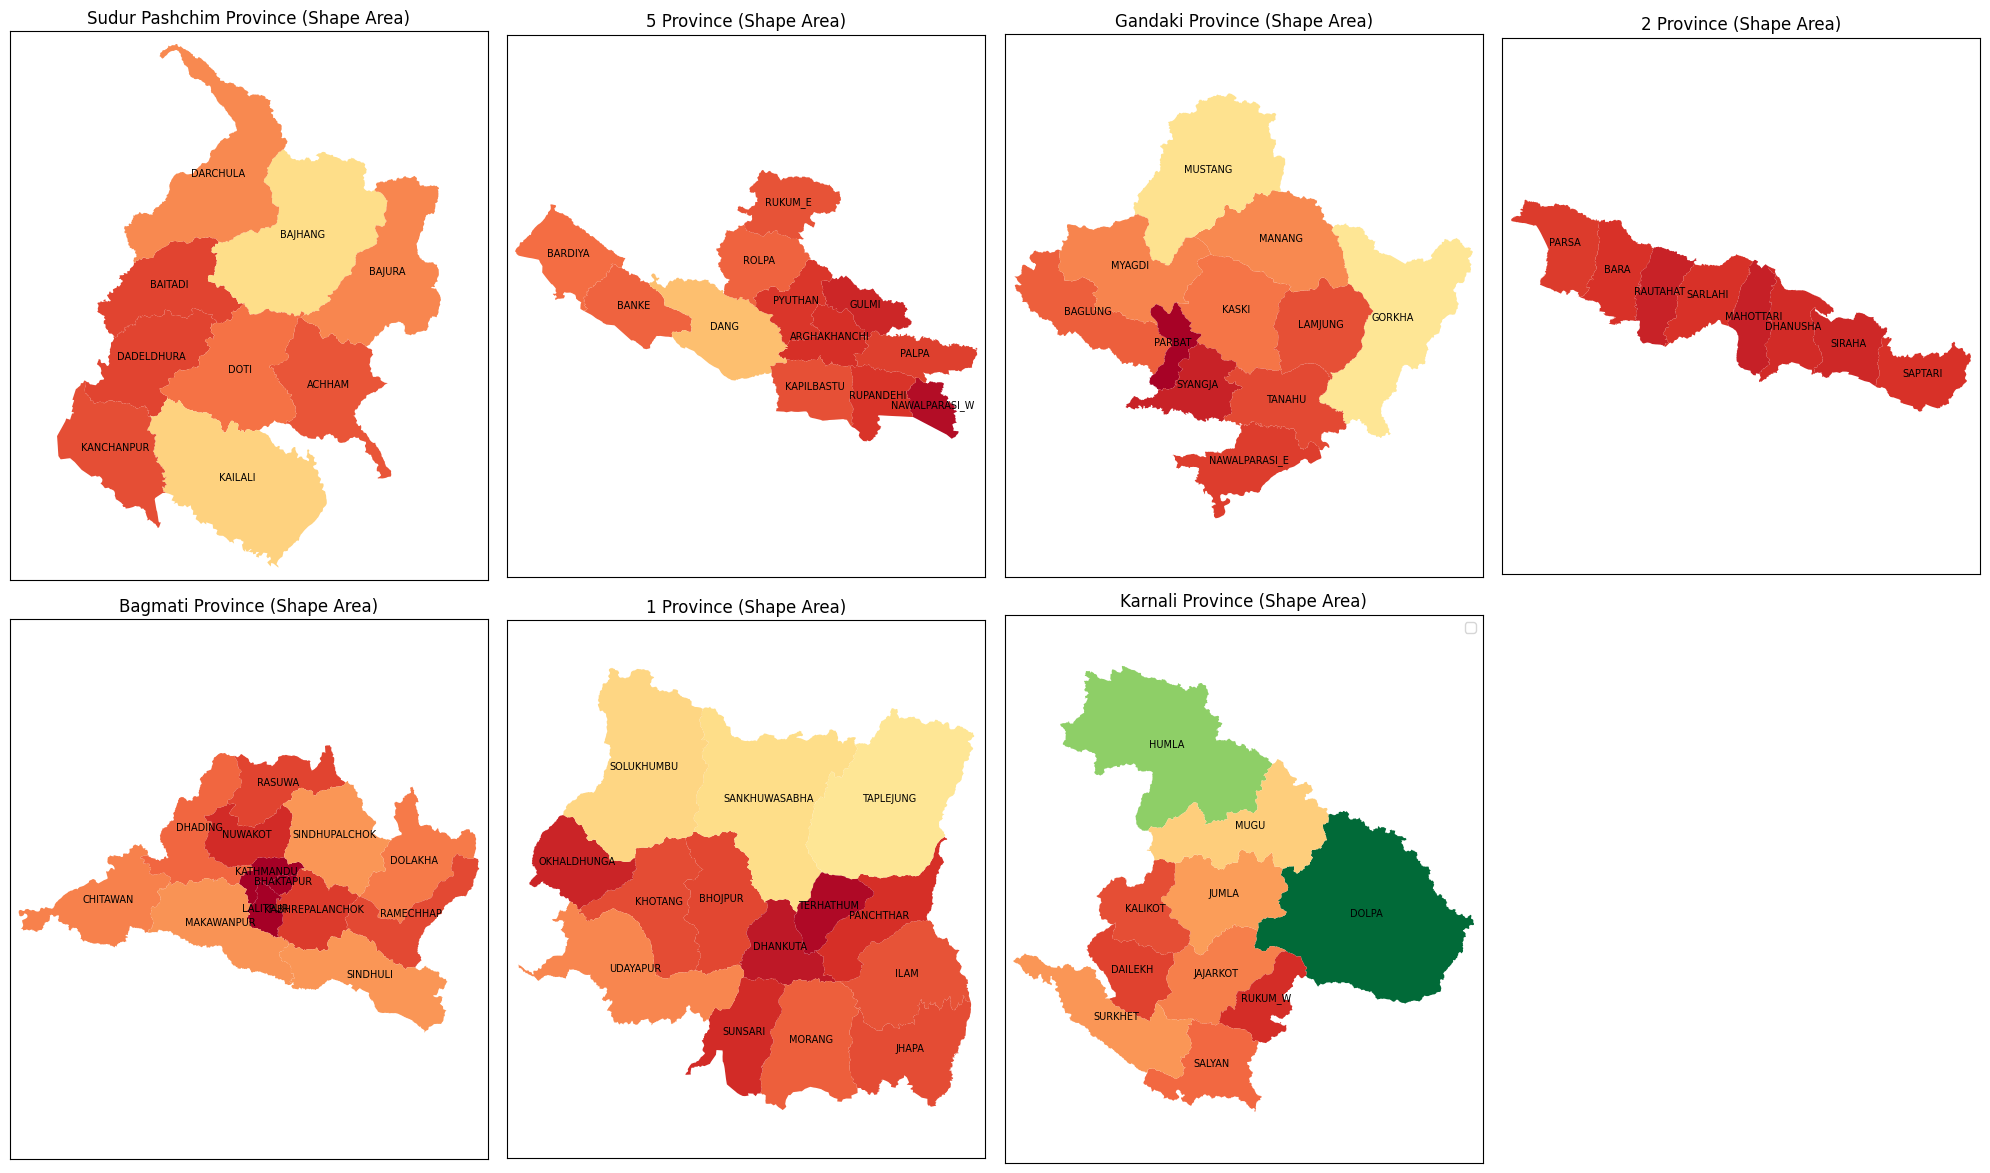

In [15]:
import numpy as np

# getting start with matplotlib suplots
fig, ax = plt.subplots(2,4,figsize=(20,12))
axis = ax.flatten()

# remove the last unncessary axis
axis[7].remove()

# for loop based on axis and province
for i, (ax, province) in enumerate(zip(axis,provinces)):

  # select the province
  df_province = df[df['Province']==province]

  # calculate geometry bounds
  x1, y1, x2, y2 = df_province.geometry.total_bounds

  # zoom to the selected feature
  max_range = np.array([x2-x1, y2-y1]).max()/2.0
  ax.set_xlim((x1+x2)*0.5-max_range-0.05, (x1+x2)*0.5+max_range+0.05)
  ax.set_ylim((y1+y2)*0.5-max_range-0.05, (y1+y2)*0.5+max_range+0.05)

  # label feature on map
  df_province.apply(lambda x: ax.annotate(text=x.DISTRICT, xy=x.geometry.centroid.coords[0], ha='center', size=7),axis=1)

  # plot province shape area
  ax.set_title(f"{province} Province (Shape Area)")
  plot = df_province.plot(column="SUM_area", ax=ax, cmap='RdYlGn', vmin=500, vmax=8000)
  ax.set_xticks([])
  ax.set_yticks([])

# Remove unncessary white spaces

plot.legend()
fig.tight_layout()
fig.savefig('/content/final_map.jpg', dpi=500, bbox_inches='tight')

## Thank you
Please make sure to suscribe to my YouTube Channel: [GeoDev](https://youtube.com/@geodev)